<a href="https://colab.research.google.com/github/soustan/Internship-Data-Analitic/blob/main/Internship_part_4_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.1 Осуществляем монтирование Google Disk. Для цели уменьшения времени загрузки DataSet.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/content/drive/MyDrive/Colab Notebooks/region_roles_26_05_22.xlsx

1.2 Осуществляем импорт библиотеки Pandas и низкоуровневой структуры данных и модулей NumPy, pandas и re.

In [3]:
import pandas as pd
import numpy as np
import re

1.3 Осуществляем загрузку DataSet. Формируем DataFame.

In [4]:
reg_rol = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/region_roles_26_05_22.xlsx')

После загрузки и считывания DataSet, необходимо провести первичный осмотр. Как указано в задании. Осуществляется это с помощью метода .info(). По выведенной сводной таблице можно узнать, что в DataSet имеется: 34 колонки и 69656 записей. При изучении 34 колонок, становится понятным, что пропуски имеются в колонках: "address" (Адрес), "salary" (Зарплата), "department" (Отдел), "sort_point_distance", "insider_interview", "response_url"(Ссылка на страницу в сети Интернет), "contacts" (Контакты), "immediate_redirect_url"(Ссылка на страницу в сети Интернет).

In [5]:
reg_rol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69656 entries, 0 to 69655
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                69656 non-null  int64  
 1   id                        69656 non-null  int64  
 2   premium                   69656 non-null  bool   
 3   name                      69656 non-null  object 
 4   department                5263 non-null   object 
 5   has_test                  69656 non-null  bool   
 6   response_letter_required  69656 non-null  bool   
 7   area                      69656 non-null  object 
 8   salary                    37590 non-null  object 
 9   type                      69656 non-null  object 
 10  address                   40318 non-null  object 
 11  response_url              1 non-null      object 
 12  sort_point_distance       0 non-null      float64
 13  published_at              69656 non-null  object 
 14  create

Дополнительно изучаем, первые 5 строк DataSet.

In [6]:
reg_rol.head()

,Unnamed: 0,id,premium,name,department,has_test,response_letter_required,area,salary,type,...,working_days,working_time_intervals,working_time_modes,accept_temporary,description,experience,key_skills,specializations,region,immediate_redirect_url
0,0,49059633,False,Младший специалист ручного тестирования,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '1.172', 'name': 'Начальный уровень, М...",Астраханская область,NaN
1,1,54653519,False,Тестировщик.Net,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 25000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<p><em><strong>Мы ищем талантливого и амбициоз...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN
2,2,55116066,False,Пентестер,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<p>Лидер на рынке систем информационной безопа...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'SQL'}, {'name': 'Linux'}, {'name': ...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN
3,3,54031261,False,Ведущий Специалист по информационным технологиям,"{'id': 'pochta-4352-office', 'name': '«Почта Р...",False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 26000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<ul> <li>Администрирование компьютерной сети</...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Пользователь ПК'}, {'name': 'Работа...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,NaN
4,4,55243040,False,Специалист по защите информации,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 20000, 'to': 20000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<strong>Обязанности:</strong> <ul> <li>Обеспеч...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'MS Dos'}, {'name': 'Диагностика ПК'...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,NaN


Вывод: В ходе изучения Датасет, удалось оценить его размер, который равен 15.7 MB. А так же, стало понятным, что: Количество булевых строк равно 5, Строк с плавающей запятой равно 1, строк с целым числом равно 2, строк с типом данных object равно 26. Столбцы, с именами id, premium, name, department, type, address и другие, имеют пустые или нулевые значения. В результате, из данных подлежащих анализу. имеются значения: Целые числа, значения отличные от нуля, а так же значения типа object, столбец salary.

В ходе изучения DataSet, удалось выявить, что критерием для дальнейшего изучения и последующего анализа, необходимо выбрать столбец(колонка) "salary" (Зарплата). При этом, необходимо так же учесть, что данные в этом столбце(колонке) представлены в виде JSON-значений (JSON — текстовый формат обмена данными, основанный на JavaScript). с позициями "from" (наименьший уровень зарплаты), "to" (наибольший уровень зарплаты), "currency" (валюта зарплаты) и "gross" (значение зарплаты до вычета налогов). В результате, становится понятным, что необходимо получить из JSON-значений, имеющиеся в них числовые данные. При этом необходимо так же учесть, что среди извлекаемых данных имеются такие как: параметры валюты и параметры связанные с налогообложением. Эти данные будут, в дальнейшем использованы в анализе.

2.1 Изучаем колонку - Заработная плата.

In [7]:
new_reg_rol = reg_rol['salary'].str.split(',',expand=True)
print(new_reg_rol)

                     0             1                   2                 3
0                  NaN           NaN                 NaN               NaN
1       {'from': 25000   'to': 50000   'currency': 'RUR'    'gross': True}
2                  NaN           NaN                 NaN               NaN
3       {'from': 26000    'to': None   'currency': 'RUR'    'gross': True}
4       {'from': 20000   'to': 20000   'currency': 'RUR'   'gross': False}
...                ...           ...                 ...               ...
69651              NaN           NaN                 NaN               NaN
69652  {'from': 130000    'to': None   'currency': 'RUR'   'gross': False}
69653   {'from': 50000    'to': None   'currency': 'RUR'   'gross': False}
69654   {'from': 85000    'to': None   'currency': 'RUR'   'gross': False}
69655              NaN           NaN                 NaN               NaN

[69656 rows x 4 columns]


2.2. Разделяем столбец "Заработная плата", на отдельные колонки "От"("salary_from"), "До"("salary_to"), "Наименование валюты"("Currency"), "Заработная плата до вычета налогов"("salary_gross"). Переводим значения "От"("salary_from") и "До"("salary_to"), к числовому типу данных. В результате этого удалось разделить колонку Заработная плата на четыре части и привести необходимые значения к числовому типу. И в последующем выберем колонку для более глубокого анализа заработной платы.

In [8]:
print(reg_rol['salary'][1])
print(reg_rol['salary'][1].replace("{", '').replace("}", '').split(',')) # превращаем из словаря в список
print(reg_rol['salary'][1].replace("{", '').replace("}", '').split(',')[0][8:]) 
#в списке берем 1-эй элемент
def salary_from(salary):
  if pd.isna(salary):
   clean_salary = np.nan
  else:
   clean_salary = salary.replace("{", '').replace("}", '').split(',')[0][8:]
   if clean_salary == 'None':
     clean_salary = np.nan
  return clean_salary
reg_rol['salary_from'] = reg_rol.salary.apply(salary_from)
reg_rol['salary_from'] = pd.to_numeric(reg_rol['salary_from'])
reg_rol['salary_from'] = reg_rol['salary_from'].astype('Int64')
reg_rol['salary_from'].describe()
reg_rol.info()

{'from': 25000, 'to': 50000, 'currency': 'RUR', 'gross': True}
["'from': 25000", " 'to': 50000", " 'currency': 'RUR'", " 'gross': True"]
25000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69656 entries, 0 to 69655
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                69656 non-null  int64  
 1   id                        69656 non-null  int64  
 2   premium                   69656 non-null  bool   
 3   name                      69656 non-null  object 
 4   department                5263 non-null   object 
 5   has_test                  69656 non-null  bool   
 6   response_letter_required  69656 non-null  bool   
 7   area                      69656 non-null  object 
 8   salary                    37590 non-null  object 
 9   type                      69656 non-null  object 
 10  address                   40318 non-null  object 
 11  response_url              1 

In [9]:
print(reg_rol['salary'][1])
print(reg_rol['salary'][1].replace("{", '').replace("}", '').split(',')) # превращаем из словаря в список
print(reg_rol['salary'][1].replace("{", '').replace("}", '').split(',')[1][7:]) 
#в списке берем 2-эй элемент
def salary_to(salary):
  if pd.isna(salary):
   clean_salary = np.nan
  else:
   clean_salary = salary.replace("{", '').replace("}", '').split(',')[1][7:]
  if clean_salary == 'None':
   clean_salary = np.nan
  return clean_salary
reg_rol['salary_to'] = reg_rol.salary.apply(salary_to)
reg_rol['salary_to'] = pd.to_numeric(reg_rol['salary_to'])
reg_rol['salary_to'] = reg_rol['salary_to'].astype('Int64')
reg_rol['salary_to'].describe()
reg_rol.info()

{'from': 25000, 'to': 50000, 'currency': 'RUR', 'gross': True}
["'from': 25000", " 'to': 50000", " 'currency': 'RUR'", " 'gross': True"]
50000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69656 entries, 0 to 69655
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                69656 non-null  int64  
 1   id                        69656 non-null  int64  
 2   premium                   69656 non-null  bool   
 3   name                      69656 non-null  object 
 4   department                5263 non-null   object 
 5   has_test                  69656 non-null  bool   
 6   response_letter_required  69656 non-null  bool   
 7   area                      69656 non-null  object 
 8   salary                    37590 non-null  object 
 9   type                      69656 non-null  object 
 10  address                   40318 non-null  object 
 11  response_url              1 

In [10]:
print(reg_rol['salary'][1])
print(reg_rol['salary'][1].replace("{", '').replace("}", '').split(',')) # превращаем из словаря в список
print(reg_rol['salary'][1].replace("{", '').replace("}", '').split(',')[2][13:]) 
#в списке берем 3-эй элемент
def salary_currency(salary):
  if pd.isna(salary):
    clean_salary = np.nan
  else:
    clean_salary = salary.replace("{", '').replace("}", '').split(',')[2][13:]
  if clean_salary == 'None':
    clean_salary = np.nan
  return clean_salary
reg_rol['salary_currency'] = reg_rol.salary.apply(salary_currency)
reg_rol['salary_currency'] = reg_rol['salary_currency'].astype('str')
reg_rol['salary_currency'].describe()
reg_rol.info()
reg_rol.groupby('salary_currency').describe()

{'from': 25000, 'to': 50000, 'currency': 'RUR', 'gross': True}
["'from': 25000", " 'to': 50000", " 'currency': 'RUR'", " 'gross': True"]
'RUR'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69656 entries, 0 to 69655
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                69656 non-null  int64  
 1   id                        69656 non-null  int64  
 2   premium                   69656 non-null  bool   
 3   name                      69656 non-null  object 
 4   department                5263 non-null   object 
 5   has_test                  69656 non-null  bool   
 6   response_letter_required  69656 non-null  bool   
 7   area                      69656 non-null  object 
 8   salary                    37590 non-null  object 
 9   type                      69656 non-null  object 
 10  address                   40318 non-null  object 
 11  response_url              1 

Unnamed: 0                                                     \
                     count         mean          std     min      25%     50%   
salary_currency                                                                 
'EUR'                 88.0  8503.329545  7021.701039    57.0  2234.25  6696.5   
'KZT'                  2.0  5158.000000  4198.800067  2189.0  3673.50  5158.0   
'RUR'              37028.0  3136.395484  4971.435612     0.0   241.00   783.5   
'USD'                472.0  7653.953390  6825.138740     1.0  1699.75  6361.5   
nan                32066.0  4464.380122  5415.423235     0.0   448.00  1871.5   

                                         id                ... salary_from  \
                      75%      max    count          mean  ...         75%   
salary_currency                                            ...               
'EUR'            14669.25  20060.0     88.0  5.532275e+07  ...      4000.0   
'KZT'             6642.50   8127.0      2.0  5.530011e+07  ...    350000.0   
'RUR'             3119.00  20065.0  37028.0  5.457823e+07  ...    100000.0   
'USD'            14159.75  19964.0    472.0  5.554693e+07  ...      3775.0   
nan               7093.75  20064.0  32066.0  5.470878e+07  ...        <NA>   

                           salary_to                                         \
                       max     count          mean            std       min   
salary_currency                                                               
'EUR'              10000.0      47.0   4176.595745    1925.680316     400.0   
'KZT'             400000.0       2.0      475000.0  318198.051534  250000.0   
'RUR'            2000000.0   19593.0  134301.72725  184177.387915      40.0   
'USD'              10000.0     314.0   4234.363057    2610.946802     450.0   
nan                   <NA>         0          <NA>           <NA>      <NA>   

                                                           
                      25%       50%       75%         max  
salary_currency                                            
'EUR'              3150.0    4000.0    5000.0      9800.0  
'KZT'            362500.0  475000.0  587500.0    700000.0  
'RUR'             50000.0   90000.0  160000.0  10000000.0  
'USD'              2500.0    4000.0    5000.0     16000.0  
nan                  <NA>      <NA>      <NA>        <NA>  

[5 rows x 40 columns]

Вывод: После осуществления группировки и выборки значений столбцов. Удалось ответить на вопрос: Какие значения валют и нулевых строк необходимо удалить в качестве отсортированных данных из DataFrame? При этом изучая DataFrame в дальнейшем. Необходимо сделать вывод о необходимости дальнейшего изучения колонки "salary_gross"(Заработная плата до уплаты налогов). 

In [11]:
print(reg_rol['salary'][1])
print(reg_rol['salary'][1].replace("{", '').replace("}", '').split(',')) # превращаем из словаря в список
print(reg_rol['salary'][1].replace("{", '').replace("}", '').split(',')[3][10:]) 
#в списке берем 4-эй элемент
def salary_gross(salary):
  if pd.isna(salary):
    clean_salary = np.nan
  else:
      clean_salary = salary.replace("{", '').replace("}", '').split(',')[3][10:]
      if clean_salary == 'None':
        clean_salary = np.nan
        return clean_salary
reg_rol['salary_gross'] = reg_rol.salary.apply(salary_gross)
reg_rol['salary_gross'] = reg_rol['salary_gross'].astype('str')
reg_rol['salary_gross'].describe()
reg_rol.info()

{'from': 25000, 'to': 50000, 'currency': 'RUR', 'gross': True}
["'from': 25000", " 'to': 50000", " 'currency': 'RUR'", " 'gross': True"]
True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69656 entries, 0 to 69655
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                69656 non-null  int64  
 1   id                        69656 non-null  int64  
 2   premium                   69656 non-null  bool   
 3   name                      69656 non-null  object 
 4   department                5263 non-null   object 
 5   has_test                  69656 non-null  bool   
 6   response_letter_required  69656 non-null  bool   
 7   area                      69656 non-null  object 
 8   salary                    37590 non-null  object 
 9   type                      69656 non-null  object 
 10  address                   40318 non-null  object 
 11  response_url              1 n

Вывод: Удалось разделить колонку Salary. В результате чего образовались такие дополнительные колонки как: 
- salary_from ;
- salary_to ;
- salary_currency ;
- salary_gross ;
На основании полученной информации, необходимо принять решение о значениях которые будут использованы в дальнейшем. Для этого приступим к следующему пункту задания.

3.1 Выборка информации для последующего вывода о необходимости изучения данных.

In [12]:
print(reg_rol['name']) 
print(reg_rol['area'])
print(reg_rol['salary'])
print(reg_rol['address'])
print(reg_rol['url']) 
print(reg_rol['alternate_url'])
print(reg_rol['snippet'])
print(reg_rol['description'])
print(reg_rol['experience'])
print(reg_rol['key_skills'])
print(reg_rol['specializations'])
print(reg_rol['region'])
print(reg_rol['salary_from'])
print(reg_rol['salary_to'])
print(reg_rol['salary_currency'])
print(reg_rol['salary_gross'])

0                  Младший специалист ручного тестирования
1                                          Тестировщик.Net
2                                                Пентестер
3         Ведущий Специалист по информационным технологиям
4                          Специалист по защите информации
                               ...                        
69651                                     Программист Java
69652                                       Программист 1C
69653           Начальник отдела информационных технологий
69654              Технический директор (DevOps, технолог)
69655    Начальник отдела по защите информации и информ...
Name: name, Length: 69656, dtype: object
0        {'id': '15', 'name': 'Астрахань', 'url': 'http...
1        {'id': '15', 'name': 'Астрахань', 'url': 'http...
2        {'id': '15', 'name': 'Астрахань', 'url': 'http...
3        {'id': '15', 'name': 'Астрахань', 'url': 'http...
4        {'id': '15', 'name': 'Астрахань', 'url': 'http...
               

3.2 Удаляем(фильтруем) не нужные для последующего анализа столбцы с данными. 

In [13]:
reg_rol_drop = reg_rol.drop(
    ['Unnamed: 0', 'id', 'area', 'address', 'premium', 'department', 'has_test', 'response_letter_required', 
     'type', 'url', 'response_url', 'alternate_url', 'sort_point_distance', 'published_at', 'created_at', 'archived', 
     'insider_interview', 'relations', 'employer', 'contacts', 'schedule', 'working_days', 
     'working_time_intervals', 'working_time_modes', 'accept_temporary', 'immediate_redirect_url', 
     'name', 'snippet', 'description', 'key_skills'
     ], axis=1)
reg_rol_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69656 entries, 0 to 69655
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   salary           37590 non-null  object
 1   experience       69656 non-null  object
 2   specializations  69656 non-null  object
 3   region           69656 non-null  object
 4   salary_from      34074 non-null  Int64 
 5   salary_to        19956 non-null  Int64 
 6   salary_currency  69656 non-null  object
 7   salary_gross     69656 non-null  object
dtypes: Int64(2), object(6)
memory usage: 4.4+ MB


Учитывая курсы соответствующих валют по отношению к (RUR)"Рубль РФ", (EUR)"Евро", (USD)"Доллар США" и (KZT)"Казахский Тенге", на текущую дату. Вычисляем значения в валюте "Рубль РФ".

In [14]:
import json

reg_rol['salary_js'] = reg_rol['salary'].fillna('{}').apply(eval)

def get_val_from(json):
    try:
        return json['from']
    except:
        return None

def get_val_to(json):
    try:
        return json['to']
    except:
        return None

def get_currency(json):
    try:
        return json['currency']
    except:
        return None

def get_gross(json):
    try:
        return json['gross']
    except:
        return None

reg_rol['salary_from'] = reg_rol['salary_js'].apply(get_val_from)
reg_rol['salary_to'] = reg_rol['salary_js'].apply(get_val_to)
reg_rol['salary_currency'] = reg_rol['salary_js'].apply(get_currency)
reg_rol['salary_gross'] = reg_rol['salary_js'].apply(get_gross)

for a in range(len(reg_rol['salary_currency'])):
    if reg_rol['salary_currency'][a] == 'USD': 
        reg_rol['salary_from'][a] *= 60.97
        reg_rol['salary_to'][a] *= 60.97
        reg_rol['salary_currency'][a] = 'RUR'
    elif reg_rol['salary_currency'][a] == 'EUR':
        reg_rol['salary_from'][a] *= 60.82
        reg_rol['salary_to'][a] *= 60.82
        reg_rol['salary_currency'][a] = 'RUR'
    elif reg_rol['salary_currency'][a] == 'KZT':
        reg_rol['salary_from'][a] *= 13.13
        reg_rol['salary_to'][a] *= 13.13
        reg_rol['salary_currency'][a] = 'RUR'
    a += 1  

for b in range(len(reg_rol['salary_gross'])):
    if reg_rol['salary_gross'][b] == 'True':
        reg_rol['salary_from'][b] *= 0.87
        reg_rol['salary_to'][b] *= 0.87
    b += 1
reg_rol['salary_gross'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to b

count     37575
unique        2
top       False
freq      25531
Name: salary_gross, dtype: object

По ходу исследования DataSet необходимо провести анализ колонок и их значений, таких как: "region" (Регион)", salary" (Зарплата), "experience" (Стаж работы), "specializations" (Специализации труда). В начале необходимо вычислить основные статистические показатели. В последствии, необходимо будет сопоставить соответствующие колоноки для определения взаимосвязанных тенденций и значений. Как и указано в Задании, колонки необходимо сопоставить по количественным и категориальным критериям. Для чего необходимо провести анализ соотношений по числу значений у разных групп по двум колонкам. А так же соотношений с числовыми значениями конкретной колонки "Зарплата".

Вычисляем основные статистические показатели.

In [15]:
reg_rol['salary_from'].describe().apply(int)

count      34074
mean       78362
std        74672
min           12
25%        40000
50%        60000
75%       100000
max      5252000
Name: salary_from, dtype: int64

Начальная зарплата в DataSet: минимальная = 12 рублей; первый квартиль(25%) = 40000 рублей; медиана(50%) = 60000 рублей; среднее значение = 78362 рублей; третий квартиль(75%) = 100000 рублей, максимальное значение = 5252000 рублей. Всего значений: 34074, стандартное отклонение = 74672.

In [16]:
reg_rol['salary_to'].describe().apply(int)

count       19956
mean       137144
std        196488
min            40
25%         50000
50%         90000
75%        170000
max      10000000
Name: salary_to, dtype: int64

Конечная зарплата в DataSet: минимальная = 40 рублей; первый квартиль(25%) = 50000 рублей, медиана(50%) = 90000 рублей, среднее значение = 137144 рублей, третий квартиль(75%) = 170000 рублей, максимальная = 10000000 рублей. Всего ненулевых значений: 19956, стандартное отклонение = 196488.

Далее, переходим к разделу графического анализ числовых данных. Для чего, пежде всего необходимо удалить пропуски в столбцах. Для чего будем использовать *.dropna() (Если наш набор данных состоит из нулевых значений, мы можем использовать метод Pandas.dropna() для анализа и удаления строк или столбцов в наборе данных.
Источник: https://pythonpip.ru/pandas/pandas-dropna). Однако, для цели фильтрации в имеющемся DataSet, слишком низкого уровня показателей зарплат. Предварительно применим данный фильтр. Основываясь на МРОТ (размере минимальной заработной платы труда в РФ), необходимо применить фильтры для конечной и начальной зарплаты. Для отображения модели графика можно выбрать боксплот, удобный для отображения числовых данных. Для чёткости отрисовки боксплота, необходимо задать ему ограничения. Это возможно осуществить с помощью метода .axis() (Источник: https://www.geeksforgeeks.org/how-to-use-axis0-and-axis1-in-pandas/).

In [17]:
filter_mrot_from = (reg_rol['salary_from'] > 13890)
filter_mrot_to = (reg_rol['salary_to'] > 13890)
filtered_reg_rol_mrot_from = reg_rol[filter_mrot_from]
filtered_reg_rol_mrot_to = reg_rol[filter_mrot_to]
salary_from_filtered = filtered_reg_rol_mrot_from['salary_from'].apply(int)
salary_to_filtered = filtered_reg_rol_mrot_to['salary_to'].apply(int)
salary_from_filtered.describe().apply(int)

count      33658
mean       79200
std        74747
min        13900
25%        40000
50%        60000
75%       100000
max      5252000
Name: salary_from, dtype: int64

In [18]:
salary_to_filtered.describe().apply(int)

count       19932
mean       137302
std        196553
min         14000
25%         50000
50%         90000
75%        170000
max      10000000
Name: salary_to, dtype: int64

После применения фильтра по МРОТ число значений у каждой из зарплат уменьшилось: у начальной зарплаты - 33658, у конечной зарплаты - 19932.

Начальная зарплата(после применения фильтра): минимальная = 13900 рубля; первый квартиль(25%) = 40000 рублей; медиана(50%) = 60000 рублей; среднее значение = 79200 рубль; третий квартиль(75%) = 100000 рублей, максимальная = 5252000 рублей, стандартное отклонение = 74747.

In [19]:
filter_mrot_from = (reg_rol['salary_from'] > 13890)
filter_mrot_to = (reg_rol['salary_to'] > 13890)
filter_reg_rol_mrot_from = reg_rol[filter_mrot_from]
filter_reg_rol_mrot_to = reg_rol[filter_mrot_to]
salary_from_filter = filter_reg_rol_mrot_from['salary_from'].apply(int)
salary_to_filter = filter_reg_rol_mrot_to['salary_to'].apply(int)
salary_from_filter.describe().apply(int)

count      33658
mean       79200
std        74747
min        13900
25%        40000
50%        60000
75%       100000
max      5252000
Name: salary_from, dtype: int64

In [20]:
salary_to_filtered.describe().apply(int)

count       19932
mean       137302
std        196553
min         14000
25%         50000
50%         90000
75%        170000
max      10000000
Name: salary_to, dtype: int64

Конечная зарплата(после применения фильтра): минимальная = 14000 рублей; первый квартиль(25%) = 50000 рублей, медиана(50%) = 90000 рублей, среднее значение = 137302 рублей, третий квартиль(75%) = 170000 рублей, максимальная = 10000000 рублей, стандартное отклонение = 196553.

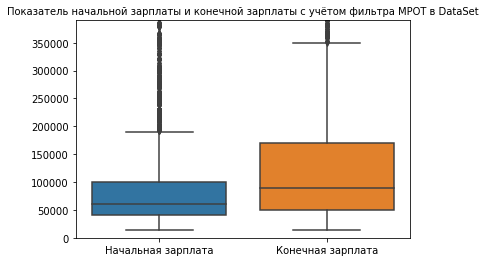

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

reg_rol_salary_filter = pd.DataFrame()
reg_rol_salary_filter['salary_from'] = salary_from_filter
reg_rol_salary_filter['salary_to'] = salary_to_filter
ax = sns.boxplot(data=reg_rol_salary_filter)
ax.set_xticklabels(['Начальная зарплата', 'Конечная зарплата'])
plt.title('Показатель начальной зарплаты и конечной зарплаты с учётом фильтра МРОТ в DataSet', fontsize=10)
plt.axis(ymin=0, ymax=390000)
plt.show()

Уровни начальной зарплаты фиксируются, в диапазоне от 14000 до 190000 рублей. На основании того, что медиана на графике расположена ближе к первому квартилю(25%). А также на основании того, что среднее значение(mean) значительно превышает медианное(50%). И к тому же, количество вакансий с начальной зарплатой которые выше медианы(50%), их значительно больше, чем вакансий с зарплатой которые ниже медианы(50%). При этом, большая часть выбросов лежит в пределах 300000 - 380000 рублей.

Для конечной зарплаты необходимо выявить больший разброс данных между первым и третьим квартилями (от 50 000 до 170 000 рублей). 
Верхняя граница характерных данных расположена в районе 360000 рублей. При этом, нижняя граница находится там же, где и у начальной зарплаты, в районе 14 000 рублей. Так же как и у начальной зарплаты, отметка медианы(50%) значительно ближе к первому квартилю(25%), в силу чего вакансий с зарплатой выше медианной больше, чем вакансий с зарплатой ниже медианы. Большая часть выбросов находится в диапазоне 950000 - 1000000 рублей.

Так же необходимо сравнить и отметить, что минимальные значения(min) и первый квартиль(25%) у начальной и конечной зарплат отличаются на величину 10000 - 15000 рублей. То их медианы(50%) различаются в диапазоне 30000 рублей.

In [22]:
reg_rol_drop.head(10)

,salary,experience,specializations,region,salary_from,salary_to,salary_currency,salary_gross
0,NaN,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'id': '1.172', 'name': 'Начальный уровень, М...",Астраханская область,<NA>,<NA>,nan,nan
1,"{'from': 25000, 'to': 50000, 'currency': 'RUR'...","{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,25000,50000,'RUR',nan
2,NaN,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,<NA>,<NA>,nan,nan
3,"{'from': 26000, 'to': None, 'currency': 'RUR',...","{'id': 'noExperience', 'name': 'Нет опыта'}","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,26000,<NA>,'RUR',nan
4,"{'from': 20000, 'to': 20000, 'currency': 'RUR'...","{'id': 'noExperience', 'name': 'Нет опыта'}","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,20000,20000,'RUR',nan
5,"{'from': 15000, 'to': 20000, 'currency': 'RUR'...","{'id': 'noExperience', 'name': 'Нет опыта'}","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,15000,20000,'RUR',nan
6,NaN,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,<NA>,<NA>,nan,nan
7,"{'from': 27000, 'to': 27000, 'currency': 'RUR'...","{'id': 'noExperience', 'name': 'Нет опыта'}","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,27000,27000,'RUR',nan
8,"{'from': 30000, 'to': 30000, 'currency': 'RUR'...","{'id': 'noExperience', 'name': 'Нет опыта'}","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,30000,30000,'RUR',nan
9,"{'from': 15000, 'to': None, 'currency': 'RUR',...","{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,15000,<NA>,'RUR',nan


Переходим к следующему пункту Задания. Проводим анализ категориальных данных. Начинаем со столбца "experience" (Стаж работы).

In [23]:
reg_rol['experience'].describe()

count                                                 69656
unique                                                    4
top       {'id': 'between1And3', 'name': 'От 1 года до 3...
freq                                                  34989
Name: experience, dtype: object

In [24]:
reg_rol['experience'].unique()

array(["{'id': 'noExperience', 'name': 'Нет опыта'}",
       "{'id': 'between1And3', 'name': 'От 1 года до 3 лет'}",
       "{'id': 'between3And6', 'name': 'От 3 до 6 лет'}",
       "{'id': 'moreThan6', 'name': 'Более 6 лет'}"], dtype=object)

In [25]:
reg_rol['experience'].value_counts()

{'id': 'between1And3', 'name': 'От 1 года до 3 лет'}    34989
{'id': 'between3And6', 'name': 'От 3 до 6 лет'}         19823
{'id': 'noExperience', 'name': 'Нет опыта'}             12646
{'id': 'moreThan6', 'name': 'Более 6 лет'}               2198
Name: experience, dtype: int64

In [26]:
filter_reg_rol_mrot_from['experience'].value_counts()

{'id': 'between1And3', 'name': 'От 1 года до 3 лет'}    16389
{'id': 'noExperience', 'name': 'Нет опыта'}              9517
{'id': 'between3And6', 'name': 'От 3 до 6 лет'}          7012
{'id': 'moreThan6', 'name': 'Более 6 лет'}                740
Name: experience, dtype: int64

In [27]:
filter_reg_rol_mrot_to['experience'].value_counts()

{'id': 'between1And3', 'name': 'От 1 года до 3 лет'}    10151
{'id': 'noExperience', 'name': 'Нет опыта'}              5094
{'id': 'between3And6', 'name': 'От 3 до 6 лет'}          4240
{'id': 'moreThan6', 'name': 'Более 6 лет'}                447
Name: experience, dtype: int64

У столбца "Стаж работы" присутствуют данные в виде JSON-значений. Метод .describe() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html), применнённый ранее, подтверждает, что пропуски отсутствуют. Метод .unique() (https://pyprog.pro/array_manipulation/unique.html) применённый ранее, подтвердил, что общее число имеющихся значений - Четыре. Среди них: "Нет опыта", "От 1 до 3 лет", "От 3 до 6 лет", "Более 6 лет". Метод .value_counts() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) подтвердил, что 1-е место по вакансиям, принадлежит к специалистам, с требованием к стажу работы 1-3 года (16389), 2-е место - без опыта (9517), 3-е место - стаж работы 3-6 лет (7012), на 4-м месте (менее всех вакансий со стажем работы от 6 лет (640).

По этим данным можно сделать вывод, что работодатель в сфере IT в большинстве случаев, подбирают кандидатов на вакансии со стажем трудовой деятельности, нежели без него. При этом значительное предпочтение, отдаётся соискателям, с минимальным опытом - от 1 до 3-х лет. Таким образом, имеется возможность фиксировать, что соискатели со стажем работы от 1 до 3 лет, в сфере IT, классифицируются как - junior-специалисты, со стажем работы от 3 до 6 лет - как middle-специалисты, а со стажем работы - более 6 лет - как senior-специалисты. 
На основании полученной информации, делаем вывод: 
Большинство имеющихся вакансий - junior and middle. 
Вакансии уровня senior - меньше всего. 
Эта информация в свою очередь, подтверждает факт отсутствия большого числа соискателей на должности руководителей.

Далее необходимо сделать вывод в части столбца МРОТ.
В этой связи видно, что число вакансий с указанной зарплатой для кандидатов у которых отсутствует стаж работы - больше, чем вакансий для middle-специалистов. Разница в числе вакансий стала меньше, но junior вакансий в 1,5 раза больше, чем у кандидатов без опыта.

Далее, проводим анализ столбца "specializations" ("Специальности")

In [28]:
reg_rol['specializations'].describe()
for c in range(100):
    print(reg_rol['specializations'][c])

[{'id': '1.172', 'name': 'Начальный уровень, Мало опыта', 'profarea_id': '1', 'profarea_name': 'Информационные технологии, интернет, телеком'}, {'id': '1.117', 'name': 'Тестирование', 'profarea_id': '1', 'profarea_name': 'Информационные технологии, интернет, телеком'}, {'id': '15.93', 'name': 'Информационные технологии, Интернет, Мультимедиа', 'profarea_id': '15', 'profarea_name': 'Начало карьеры, студенты'}]
[{'id': '1.221', 'name': 'Программирование, Разработка', 'profarea_id': '1', 'profarea_name': 'Информационные технологии, интернет, телеком'}, {'id': '1.82', 'name': 'Инженер', 'profarea_id': '1', 'profarea_name': 'Информационные технологии, интернет, телеком'}, {'id': '1.117', 'name': 'Тестирование', 'profarea_id': '1', 'profarea_name': 'Информационные технологии, интернет, телеком'}]
[{'id': '1.221', 'name': 'Программирование, Разработка', 'profarea_id': '1', 'profarea_name': 'Информационные технологии, интернет, телеком'}, {'id': '1.82', 'name': 'Инженер', 'profarea_id': '1', '

Как видно из метода .describe() , пропуски отсутствуют. При этом уникальных значений очень большое количество, для цели деления столбца на необходимые значения. Просмотр значений столбца (а именно, использование цикла с определённым количеством элементов). Подтвердил предположение, что данные содержат строковые значения списка. И представляют собой JSON-значения. Данные значения, характеризуются как: 
- Название специальности и её id ;
- Название сферы труда и её id ;
- Количество JSON-значений в списке находится в диапазоне от единицы рассматривая первые 100 элементов, 5 объектов. Так как в исследовании рассматриваются IT-вакансии, то в колонке "Специализации" необходимы прежде всего вакансии сферы "Информационные технологии, Интернет, Телеком". Так же необходимо отметить, что количество значений внутри записей изменяется. И потому, эти значения, можно разнести на некоторое количество отдельных столбцов. И классифицировать их по названию Специализации.

Предлагаю для дальнейшего анализа алгоритм, включающий в себя:

- Данные в столбце, необходимо преобразовать в список JSON-значений;

- Для каждого столбца применяем функцию извлечения названия Специализации ;

- Генерируются необходимые 5 столбцов с названиями сфер труда и 5 столбцов с названием специализации;

- Генерируются 5 новых столбцов для фильтрации существующих с названием специализации, чтобы применить фильтр и исключить из него только те названия специализации, которые соответствуют лишь сфере труда. Таким образом, останутся необходимые нам: 
"Информационные технологии, Интернет, Телеком"

- Генерируется дополнительный DataFrame, который заполняется столбцами, с применённым фильтром столбцов названий Специализаций ;

- Значения столбцов - "NaN", заменяются нулями ;

- Создаётся колонка "SUM", в которую заносится сумма значений по каждой записи.

In [29]:
import numpy as np

reg_rol['specializations_js'] = [eval(row) for row in reg_rol['specializations']]

def index_prof_0(data):
    try:
        return data[0]['profarea_name']
    except:
        return None

def index_prof_1(data):
    try:
        return data[1]['profarea_name']
    except:
        return None

def index_prof_2(data):
    try:
        return data[2]['profarea_name']
    except:
        return None

def index_prof_3(data):
    try:
        return data[3]['profarea_name']
    except:
        return None

def index_prof_4(data):
    try:
        return data[4]['profarea_name']
    except:
        return None

def index_name_0(data):
    try:
        return data[0]['name']
    except:
        return None

def index_name_1(data):
    try:
        return data[1]['name']
    except:
        return None

def index_name_2(data):
    try:
        return data[2]['name']
    except:
        return None

def index_name_3(data):
    try:
        return data[3]['name']
    except:
        return None

def index_name_4(data):
    try:
        return data[4]['name']
    except:
        return None

reg_rol['specializations_prof_0'] = reg_rol['specializations_js'].apply(index_prof_0)
reg_rol['specializations_prof_1'] = reg_rol['specializations_js'].apply(index_prof_1)
reg_rol['specializations_prof_2'] = reg_rol['specializations_js'].apply(index_prof_2)
reg_rol['specializations_prof_3'] = reg_rol['specializations_js'].apply(index_prof_3)
reg_rol['specializations_prof_4'] = reg_rol['specializations_js'].apply(index_prof_4)
reg_rol['specializations_name_0'] = reg_rol['specializations_js'].apply(index_name_0)
reg_rol['specializations_name_1'] = reg_rol['specializations_js'].apply(index_name_1)
reg_rol['specializations_name_2'] = reg_rol['specializations_js'].apply(index_name_2)
reg_rol['specializations_name_3'] = reg_rol['specializations_js'].apply(index_name_3)
reg_rol['specializations_name_4'] = reg_rol['specializations_js'].apply(index_name_4)
reg_rol['specializations_name_clear_0'] = pd.Series()
reg_rol['specializations_name_clear_1'] = pd.Series() 
reg_rol['specializations_name_clear_2'] = pd.Series()
reg_rol['specializations_name_clear_3'] = pd.Series() 
reg_rol['specializations_name_clear_4'] = pd.Series()
for s in range(len(reg_rol['specializations'])):
    if reg_rol['specializations_prof_0'][s] == 'Информационные технологии, интернет, телеком':
        reg_rol['specializations_name_clear_0'][s] = reg_rol['specializations_name_0'][s]
    elif reg_rol['specializations_prof_1'][s] == 'Информационные технологии, интернет, телеком':
        reg_rol['specializations_name_clear_1'][s] = reg_rol['specializations_name_1'][s]
    elif reg_rol['specializations_prof_2'][s] == 'Информационные технологии, интернет, телеком':
        reg_rol['specializations_name_clear_2'][s] = reg_rol['specializations_name_2'][s]
    elif reg_rol['specializations_prof_3'][s] == 'Информационные технологии, интернет, телеком':
        reg_rol['specializations_name_clear_3'][s] = reg_rol['specializations_name_3'][s]
    elif reg_rol['specializations_prof_4'][s] == 'Информационные технологии, интернет, телеком':
        reg_rol['specializations_name_clear_4'][s] = reg_rol['specializations_name_4'][s]
    s += 1

reg_rol_snc = pd.DataFrame()
reg_rol_snc['0'] = reg_rol['specializations_name_clear_0']
reg_rol_snc['1'] = reg_rol['specializations_name_clear_1']
reg_rol_snc['2'] = reg_rol['specializations_name_clear_2']
reg_rol_snc['3'] = reg_rol['specializations_name_clear_3']
reg_rol_snc['4'] = reg_rol['specializations_name_clear_4']
reg_rol_snc_svc = reg_rol_snc.apply(pd.Series.value_counts)
reg_rol_snc_svc = reg_rol_snc_svc.fillna(0).astype(int)
reg_rol_snc_svc['sum'] = reg_rol_snc_svc.sum(axis=1)
reg_rol_snc_svc_o = 0
for su in range(len(reg_rol_snc_svc)):
    if reg_rol_snc_svc['sum'][su] < 1000:
        reg_rol_snc_svc_o += reg_rol_snc_svc['sum'][su]
    su += 1
reg_rol_snc_svc_7 = reg_rol_snc_svc.nlargest(n=7, columns=['sum'])
reg_rol_snc_svc_val = []
for su1 in reg_rol_snc_svc_7['sum']:
    reg_rol_snc_svc_val.append(su1)
reg_rol_snc_svc_val.append(reg_rol_snc_svc_o)
reg_rol_snc_svc_ind = []
for su2 in reg_rol_snc_svc_7.index:
    reg_rol_snc_svc_ind.append(su2)
reg_rol_snc_svc_ind.append('Другое')
reg_rol_snc_svc.sort_values('sum', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:76: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:78: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: Deprecation

,0,1,2,3,4,sum
"Программирование, Разработка",21337,10,6,0,3,21356
Сетевые технологии,6974,2,1,0,0,6977
Аналитик,29,5675,3,3,1,5711
"Начальный уровень, Мало опыта",5591,5,1,0,0,5597
Управление проектами,15,3240,5,5,3,3268
Игровое ПО,2890,0,0,0,0,2890
Компьютерная безопасность,2833,4,0,0,0,2837
"CTO, CIO, Директор по IT",2,589,0,0,0,591
Технический писатель,478,0,0,0,0,478
Арт-директор,149,0,0,0,0,149


Раздел где происходит расчёт основных сфер труда, в части имеющихся вакансий и его порядок расчёта представляет из себя следующую последовательность:

- Из суммарного количества значений, для всех сфер труда необходимо выяснить, наиболее  часто встречающиеся ;

- Выявление суммарного количества названий сфер труда, среди всех вакансий. С использованием метода for(цикл) и s +=1 (счётчика чисел).

In [30]:
reg_rol_sps = (reg_rol['specializations_prof_0'].value_counts() + 
               reg_rol['specializations_prof_1'].value_counts() +
               reg_rol['specializations_prof_2'].value_counts() + 
               reg_rol['specializations_prof_3'].value_counts() +
               reg_rol['specializations_prof_4'].value_counts())
reg_rol['specializations_prof_IT'] = pd.Series(np.nan)
reg_rol['specializations_prof_management'] = pd.Series(np.nan)
reg_rol['specializations_prof_sales'] = pd.Series(np.nan)
reg_rol['specializations_prof_marketing'] = pd.Series(np.nan)
reg_rol['specializations_prof_consulting'] = pd.Series(np.nan)
reg_rol['specializations_prof_construction'] = pd.Series(np.nan)
reg_rol['specializations_prof_art'] = pd.Series(np.nan)
reg_rol['specializations_prof_chief'] = pd.Series(np.nan)
reg_rol['specializations_prof_other'] = pd.Series(np.nan)
spec_prof_list = ['Информационные технологии, интернет, телеком', 'Управление персоналом, тренинги', \
     'Продажи', 'Маркетинг, реклама, PR', 'Консультирование', 'Строительство, недвижимость', \
     'Искусство, развлечения, масс-медиа', 'Высший менеджмент']
IT_count = 0
management_count = 0
sales_count = 0
marketing_count = 0
consulting_count = 0
construction_count = 0
art_count = 0
chief_count = 0
other_count = 0
for l in range(len(reg_rol['specializations'])):
    if reg_rol['specializations_prof_0'][l] == 'Информационные технологии, интернет, телеком' or \
       reg_rol['specializations_prof_1'][l] == 'Информационные технологии, интернет, телеком' or \
       reg_rol['specializations_prof_2'][l] == 'Информационные технологии, интернет, телеком' or \
       reg_rol['specializations_prof_3'][l] == 'Информационные технологии, интернет, телеком' or \
       reg_rol['specializations_prof_4'][l] == 'Информационные технологии, интернет, телеком':
        IT_count += 1
        reg_rol['specializations_prof_IT'][l] = 'Информационные технологии, интернет, телеком'
    l += 1
for l1 in range(len(reg_rol['specializations'])):
    if reg_rol['specializations_prof_0'][l1] == 'Управление персоналом, тренинги' or \
         reg_rol['specializations_prof_1'][l1] == 'Управление персоналом, тренинги' or \
         reg_rol['specializations_prof_2'][l1] == 'Управление персоналом, тренинги' or \
         reg_rol['specializations_prof_3'][l1] == 'Управление персоналом, тренинги' or \
         reg_rol['specializations_prof_4'][l1] == 'Управление персоналом, тренинги':
        management_count += 1
        reg_rol['specializations_prof_management'][l1] = 'Управление персоналом, тренинги'
    l1 += 1
for l2 in range(len(reg_rol['specializations'])):
    if reg_rol['specializations_prof_0'][l2] == 'Продажи' or \
         reg_rol['specializations_prof_1'][l2] == 'Продажи' or \
         reg_rol['specializations_prof_2'][l2] == 'Продажи' or \
         reg_rol['specializations_prof_3'][l2] == 'Продажи' or \
         reg_rol['specializations_prof_4'][l2] == 'Продажи':
        sales_count += 1
        reg_rol['specializations_prof_sales'][l2] = 'Продажи'
    l2 += 1
for l3 in range(len(reg_rol['specializations'])):
    if reg_rol['specializations_prof_0'][l3] == 'Маркетинг, реклама, PR' or \
         reg_rol['specializations_prof_1'][l3] == 'Маркетинг, реклама, PR' or \
         reg_rol['specializations_prof_2'][l3] == 'Маркетинг, реклама, PR' or \
         reg_rol['specializations_prof_3'][l3] == 'Маркетинг, реклама, PR' or \
         reg_rol['specializations_prof_4'][l3] == 'Маркетинг, реклама, PR':
        marketing_count += 1
        reg_rol['specializations_prof_marketing'][l3] = 'Маркетинг, реклама, PR'
    l3 += 1
for l4 in range(len(reg_rol['specializations'])):
    if reg_rol['specializations_prof_0'][l4] == 'Консультирование' or \
         reg_rol['specializations_prof_1'][l4] == 'Консультирование' or \
         reg_rol['specializations_prof_2'][l4] == 'Консультирование' or \
         reg_rol['specializations_prof_3'][l4] == 'Консультирование' or \
         reg_rol['specializations_prof_4'][l4] == 'Консультирование':
        consulting_count += 1
        reg_rol['specializations_prof_consulting'][l4] = 'Консультирование'
    l4 += 1
for l5 in range(len(reg_rol['specializations'])):
    if reg_rol['specializations_prof_0'][l5] == 'Строительство, недвижимость' or \
         reg_rol['specializations_prof_1'][l5] == 'Строительство, недвижимость' or \
         reg_rol['specializations_prof_2'][l5] == 'Строительство, недвижимость' or \
         reg_rol['specializations_prof_3'][l5] == 'Строительство, недвижимость' or \
         reg_rol['specializations_prof_4'][l5] == 'Строительство, недвижимость':
        construction_count += 1
        reg_rol['specializations_prof_construction'][l5] = 'Строительство, недвижимость'
    l5 += 1
for l6 in range(len(reg_rol['specializations'])):
    if reg_rol['specializations_prof_0'][l6] == 'Искусство, развлечения, масс-медиа' or \
         reg_rol['specializations_prof_1'][l6] == 'Искусство, развлечения, масс-медиа' or \
         reg_rol['specializations_prof_2'][l6] == 'Искусство, развлечения, масс-медиа' or \
         reg_rol['specializations_prof_3'][l6] == 'Искусство, развлечения, масс-медиа' or \
         reg_rol['specializations_prof_4'][l6] == 'Искусство, развлечения, масс-медиа':
        art_count += 1
        reg_rol['specializations_prof_art'][l6] = 'Искусство, развлечения, масс-медиа'
    l6 += 1
for l7 in range(len(reg_rol['specializations'])):
    if reg_rol['specializations_prof_0'][l7] == 'Высший менеджмент' or \
         reg_rol['specializations_prof_1'][l7] == 'Высший менеджмент' or \
         reg_rol['specializations_prof_2'][l7] == 'Высший менеджмент' or \
         reg_rol['specializations_prof_3'][l7] == 'Высший менеджмент' or \
         reg_rol['specializations_prof_4'][l7] == 'Высший менеджмент':
        chief_count += 1
        reg_rol['specializations_prof_chief'][l7] = 'Высший менеджмент'
    l7 += 1
for l8 in range(len(reg_rol['specializations'])):
    if reg_rol['specializations_prof_0'][l8] not in spec_prof_list and \
         reg_rol['specializations_prof_1'][l8] not in spec_prof_list and \
         reg_rol['specializations_prof_2'][l8] not in spec_prof_list and \
         reg_rol['specializations_prof_3'][l8] not in spec_prof_list and \
         reg_rol['specializations_prof_4'][l8] not in spec_prof_list:
        other_count += 1
        reg_rol['specializations_prof_other'][l8] = 'Другое'
    l8 += 1
prof_index = ['IT_count', 'management_count', 'sales_count', 'marketing_count', \
                  'consulting_count', 'construction_count', 'art_count', 'chief_count', \
                  'other_count']
prof_values = [IT_count, management_count, sales_count, marketing_count, consulting_count, \
      construction_count, art_count, chief_count, other_count]
prof_dict = dict(zip(prof_index, prof_values))
prof_dict

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher

{'IT_count': 50384,
 'management_count': 8484,
 'sales_count': 12131,
 'marketing_count': 11587,
 'consulting_count': 13283,
 'construction_count': 6186,
 'art_count': 2916,
 'chief_count': 1316,
 'other_count': 1850}

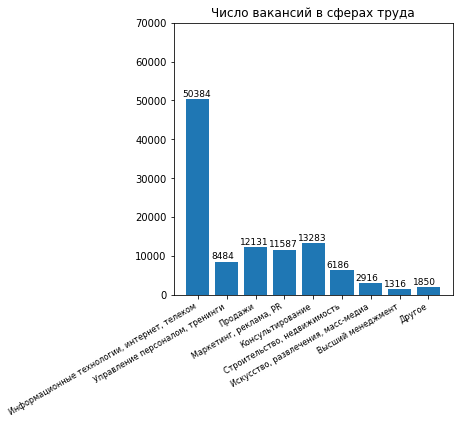

In [31]:
z = ['Информационные технологии, интернет, телеком', 'Управление персоналом, тренинги', \
     'Продажи', 'Маркетинг, реклама, PR', 'Консультирование', 'Строительство, недвижимость', \
     'Искусство, развлечения, масс-медиа', 'Высший менеджмент', 'Другое']
plt.figure(figsize=(5, 5))
plt.bar(prof_index, prof_values)
xlocs, xlabs = plt.xticks()
plt.xticks(prof_index, z, rotation=30, ha='right', fontsize='8')
plt.ylim(None, 70000)
plt.title('Число вакансий в сферах труда', fontsize=12)
for j, k in enumerate(prof_values):
    plt.text(xlocs[j] - 0.54, k + 700, str(k), fontsize=9)
plt.show()

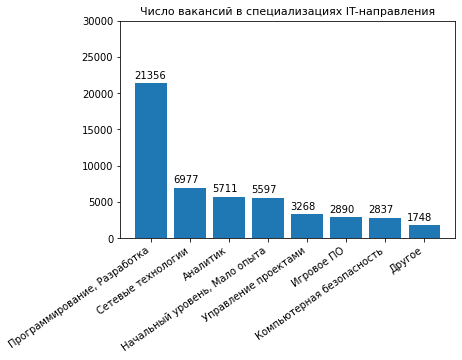

In [32]:
plt.bar(reg_rol_snc_svc_ind, reg_rol_snc_svc_val)
plt.xticks(reg_rol_snc_svc_ind, rotation=35, ha='right')
plt.ylim(None, 30000)
plt.title('Число вакансий в специализациях IT-направления', fontsize=11)
for j, k in enumerate(reg_rol_snc_svc_val):
    plt.text(xlocs[j] - 0.43, k + 700, str(k))
plt.show()

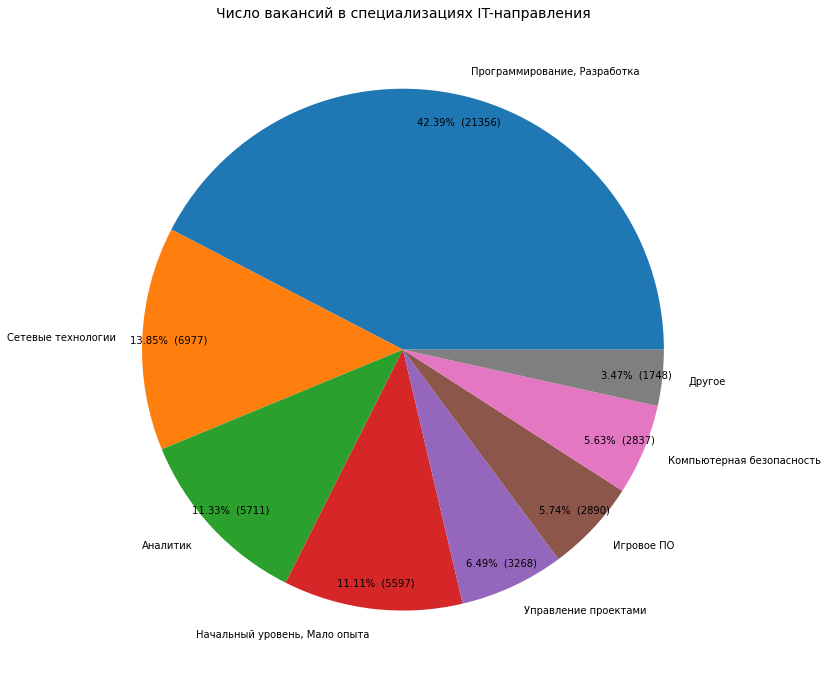

In [33]:
plt.figure(figsize=(12, 12))
plt.style.use('default')
values = reg_rol_snc_svc_val 
labels = reg_rol_snc_svc_ind

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct, v=val)
    return my_autopct

plt.pie(values, labels=labels, autopct=make_autopct(values), pctdistance=0.9)
plt.title('Число вакансий в специализациях IT-направления', fontsize=14)
plt.show()

При рассмотрении направления "Сфера труда" расчёты вакансий в абсолютном исчислении. Что и послужило основанием для изображения в виде гистограммы. Как видно из расчётов и графиков, число вакансий "Сферы IT" составило 50384 (что в свою очередь составляет 72% от общего числа вакансий). Этот показатель, примерно в 4 раза опережает направление "Вакансии консалтинга" (13283), далее следует направление "Продажи" (12131), "Реклама" (11587). Оставшиеся "Сферы труда" с числом вакансий < 1000 были суммированы в категорию "Другое" (1850).

Взгляд на этот же график исследования по специальности "IT-вакансий", изображенный на графике в виде круга и его долей даёт нам состояние в долевом отношении, среди IT-вакансий. А именно: 
Среди 50384 "IT-вакансий", что составляет чуть меньше половины от общего количества (21356, и составляет 42%) и относится к направлению "Разработка". Далее следует 14% и 6977 вакансий - относящиеся к направлению "Сетевые технологии". Примерно одинаковое количество - 11% к направлению "Аналитика" (5711 вакансий) и направлению "Начальный уровень, мало опыта" (5597). Примерно по 6% остаётся за вакансиями "Управление проектами", "Игровое ПО" и "Компьютерная безопасность". Так же, как и на предыдущем графике, остальные специальности с числом вакансий < 1000 были объединены в категорию "Другое" (3.5% и количество вакансий 1748, соответственно).

Переходим к анализу и исследованию. Исследуем взаимосвязь колонок "Начальная зарплата"(salary_from) и "Специализация"(specialization).

In [40]:
st1 = reg_rol.groupby(['specializations_prof_IT'])['salary_from'].describe().astype(int)
st2 = reg_rol.groupby(['specializations_prof_management'])['salary_from'].describe().astype(int)
st3 = reg_rol.groupby(['specializations_prof_sales'])['salary_from'].describe().astype(int)
st4 = reg_rol.groupby(['specializations_prof_marketing'])['salary_from'].describe().astype(int)
st5 = reg_rol.groupby(['specializations_prof_consulting'])['salary_from'].describe().astype(int)
st6 = reg_rol.groupby(['specializations_prof_construction'])['salary_from'].describe().astype(int)
st7 = reg_rol.groupby(['specializations_prof_art'])['salary_from'].describe().astype(int)
st8 = reg_rol.groupby(['specializations_prof_chief'])['salary_from'].describe().astype(int)
st9 = reg_rol.groupby(['specializations_prof_other'])['salary_from'].describe().astype(int)

In [ ]:
Сфера труда                                   count	 mean	   std 	  min	   25%    50%	    75%	    max
Информационные технологии, интернет, телеком	19264	 86293  63525	 15974	40000	 69000	110000  1000000
Продажи	                                       7460	 96048  87540	 16000	50000	 70000	100000  2000000
Консультирование	                             7279	101574  90228	 16000	50000	 75000	120000	2000000
Строительство, недвижимость	                   5640	100487  95785	 16000	50000	 70000	100000	2000000
Управление персоналом, тренинги	               5162	 48461  26751	 15723	31000	 40000	 60000	 350000
Маркетинг, реклама, PR	                       4363	 70228  50709	 16000	37000	 50000	 85344 	 600000
Искусство, развлечения, масс-медиа	           1345	 60302  40268	 16000	35000	 50000	 70000	 350000
Высший менеджмент	                              587	117568  93901	 20000	70000	100000	130000	1000000
Другое	                                       1125	 50618  49846	 15500	30000	 40000	 55000	 500000

Величины, указзанные в таблице, свидетельствуют о том, что восемь самых популярных по вакансиям "Сфер труда" значительно превосходят в части зарплат все остальные сферы деятельности. 
Единственная позиция - "Управление персоналом, тренинги", уровень которой по зарплате можно сравнить с менее значимыми сферами. При этом среднее значение даже меньше, а медиана равна. За исключением максимальных значений, остальные "Сферы труда", превосходят позицию "Высший менеджмент". Данная позиция, с показателем количества вакансий < 1000, однако в первом квартиле(25%), значение зарплаты достигает 70000 руб. Однако, для остальных "Сфер труда" значение первого квартиля(25%), равно 50000 руб. Медианное значение(50%) зарплаты достигает 100000 руб. При этом, у "Сферы труда" - "Строительство, недвижимость", "Продажи", основные показатели идентичны. В то же время, средняя зарплата для "Строительство, недвижимость", на 4000 рублей выше, чем у "Сферы труда" - "Продажи".

Несущественную взаимосвязь между "Сферой труда" и "Уровнем зарплат" среди вакансий отфильтрованного с учётом МРОТ DataSet возможно отследить таким образом. 
1. Первые четыре по числу вакансий "Сферы труда" имеют медианную(50%) зарплату выше на 20-25 тыс. рублей. В третьем(75%) квартиле, зарплата превышает 100000 руб. 
2. При этом, уровень зарплаты "Сферы IT", является самым высоким по отношению к числу вакансий, данной сферы. С другой стороны, он же уступает уровню зарплат, следующих по списку направлений, скорее всего ввиду довольно высокой степени профилированности IT-индустрии. Снижение уровня зарплат по мере снижения числа вакансий происходит крайне неравномерно. В этом ключе, резко выделяется низким уровнем зарплат, сфера "Управление персоналом, тренинги". И наоборот, высоким уровнем зарплат, сфера "Высший менеджмент". Эти обстоятельства стоит связать некоторыми уникальными особенностями указанных сфер деятельности. При этом, показатели уровня зарплат, по совокупности не значительных и представленных в DataSet сфер труда продолжают снижаться.

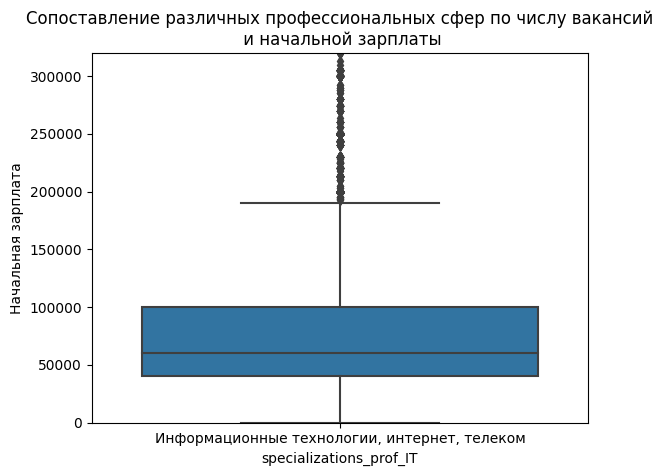

In [42]:
ax1 = sns.boxplot(x='specializations_prof_IT', y='salary_from', data=reg_rol)
ax1.set_xticklabels(labels=(st1.index), fontsize=10) 
plt.axis(ymin=0, ymax=320000)  # лимит по оси ординат
plt.title("Сопоставление различных профессиональных сфер по числу вакансий\n и начальной зарплаты", fontsize=12)
plt.ylabel("Начальная зарплата")
plt.show()

Графический анализ boxplots, свидетельствует о том, что несмотря на числовые показатели, высшая граница данных в связке с уровнем зарплат имеется у "Сферы IT", "Консалтинг" и "Высший менеджмент" более 200000. За исключением сферы "Высший менеджмент", у всех остальных сфер,медиана(50%) сдвинута вниз, ближе к первому квартилю(25%). Первые восемь сфер труда, имеют самый не значительный разброс зарплат. При этом, самый не значительный имеется у сферы - "Управление персоналом, тренинги". Самый же большой, у сферы труда - "Консультирование". 

Равенство значений зарплат, таких сфер труда как "Строительство, недвижимость" и сфера "Продажи", запечатлён на каждом из графиков. Отличие которых имеется только в выбросах. Этот фактор говорит нам о том, что вакансии этих сфер труда основным образом идентичны.

Графический анализ, подтверждает выводы числового, а именно: 
1. Необходимо выделить три группы специальностей по уровню зарплат: 
а) третий квартиль < 100000 руб.: 
- "Сетевые технологии", 
- "Начальный уровень", 
- "Игровое ПО", 
- "Компьютерная безопасность"; 
б) третий квартиль от 100000 до 150000 руб.: 
- "Программирование, Разработка", "Аналитик", 
- "Технический писатель",
- "Другое"; 
в) третий квартиль = 200000 руб.: 
- "Управление проектами", 
- "IT-директор". 
2. У направлений первой группы наименьший разброс зарплат. 
Из второй группы к ним же примыкают 
- "Технический писатель",
- "Другое" ;
Эти же квартили зарплат, находятся среди показателей 50000-100000 руб. 
3. У Направлений третьей группы разброс зарплат более 100000 руб. Медианы зарплат всех профилей смещены вниз от центра, что свидетельствует о том, что вакансии с высокой зарплатой, имеют преимущество, перед остальными. У категорий "Технический писатель" и "Другое", несмотря на принадлежность ко второй группе, верхняя граница характерных данных относительно низка менее 200000 руб. По этому же показателю, сюда же включается профиль "Компьютерная безопасность". У направлений, отличных от руководящих работников, верхняя граница характерных данных даже выше, чем у руководителей. С другой стороны выше медиана(50%) и ниже первый квартиль(25%). И потому, необходимо сделать вывод, что вакансии руководителей оплачиваются лучше чем у сотрудников.

На этом фрагменте проводим окончание анализа данных.

In [ ]:
reg_rol.dropna(subset=['salary_from','salary_to'])

,name,salary,snippet,description,experience,key_skills,specializations,region,salary_from,salary_to,salary_currency,salary_gross
1,Тестировщик.Net,"{'from': 25000, 'to': 50000, 'currency': 'RUR'...",{'requirement': 'Мы ищем талантливого и амбици...,<p><em><strong>Мы ищем талантливого и амбициоз...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,25000,50000,'RUR',nan
4,Специалист по защите информации,"{'from': 20000, 'to': 20000, 'currency': 'RUR'...","{'requirement': 'Медицинская комиссия, справка...",<strong>Обязанности:</strong> <ul> <li>Обеспеч...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'MS Dos'}, {'name': 'Диагностика ПК'...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,20000,20000,'RUR',nan
5,Специалист по защите информации,"{'from': 15000, 'to': 20000, 'currency': 'RUR'...",{'requirement': 'Наличие высшего образования п...,<strong>Обязанности:</strong> <ul> <li>Выполне...,"{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,15000,20000,'RUR',nan
7,Специалист по защите информации,"{'from': 27000, 'to': 27000, 'currency': 'RUR'...",{'requirement': 'Высшее образование по направл...,<strong>Обязанности:</strong> <ul> <li>Проведе...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Пользователь ПК'}, {'name': 'Работа...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,27000,27000,'RUR',nan
8,Оператор организационного сектора,"{'from': 30000, 'to': 30000, 'currency': 'RUR'...",{'requirement': 'Высшее техническое образовани...,<strong>Обязанности:</strong> <ul> <li>выполня...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Пользователь ПК'}, {'name': 'Работа...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,30000,30000,'RUR',nan
...,...,...,...,...,...,...,...,...,...,...,...,...
69643,Инженер-программист,"{'from': 48000, 'to': 53000, 'currency': 'RUR'...",{'requirement': 'Высшее образование. Опыт рабо...,<p><strong>ООО &quot;Бастион&quot; является пр...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'оформление документации'}, {'name':...","[{'id': '1.221', 'name': 'Программирование, Ра...",Тульская область,48000,53000,'RUR',nan
69644,Инженер-программист,"{'from': 48000, 'to': 53000, 'currency': 'RUR'...",{'requirement': 'Высшее образование. Опыт рабо...,<p><strong>ООО &quot;Бастион&quot; является пр...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'оформление документации'}, {'name':...","[{'id': '1.221', 'name': 'Программирование, Ра...",Тульская область,48000,53000,'RUR',nan
69646,"Веб-программист (PHP, Битрикс)","{'from': 70000, 'to': 130000, 'currency': 'RUR...",{'requirement': 'Уверенное владение 1C-Битрикс...,<p><strong>Чего мы ожидаем от кандидата:</stro...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'PHP'}, {'name': 'HTML'}, {'name': '...","[{'id': '1.221', 'name': 'Программирование, Ра...",Тульская область,70000,130000,'RUR',nan
69647,"Ведущий веб-программист (PHP, Битрикс)","{'from': 130000, 'to': 200000, 'currency': 'RU...",{'requirement': 'Уверенное владение всем техно...,<p><strong>Чего мы ожидаем от кандидата:</stro...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'Веб-программирование'}, {'name': 'У...","[{'id': '1.221', 'name': 'Программирование, Ра...",Тульская область,130000,200000,'RUR',nan


In [ ]:
reg_rol = reg_rol_drop.dropna() #Удаляем пустые строки
reg_rol.dropna()

,name,salary,snippet,description,experience,key_skills,specializations,region,salary_from,salary_to,salary_currency,salary_gross
1,Тестировщик.Net,"{'from': 25000, 'to': 50000, 'currency': 'RUR'...",{'requirement': 'Мы ищем талантливого и амбици...,<p><em><strong>Мы ищем талантливого и амбициоз...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,25000,50000,'RUR',nan
4,Специалист по защите информации,"{'from': 20000, 'to': 20000, 'currency': 'RUR'...","{'requirement': 'Медицинская комиссия, справка...",<strong>Обязанности:</strong> <ul> <li>Обеспеч...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'MS Dos'}, {'name': 'Диагностика ПК'...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,20000,20000,'RUR',nan
5,Специалист по защите информации,"{'from': 15000, 'to': 20000, 'currency': 'RUR'...",{'requirement': 'Наличие высшего образования п...,<strong>Обязанности:</strong> <ul> <li>Выполне...,"{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,15000,20000,'RUR',nan
7,Специалист по защите информации,"{'from': 27000, 'to': 27000, 'currency': 'RUR'...",{'requirement': 'Высшее образование по направл...,<strong>Обязанности:</strong> <ul> <li>Проведе...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Пользователь ПК'}, {'name': 'Работа...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,27000,27000,'RUR',nan
8,Оператор организационного сектора,"{'from': 30000, 'to': 30000, 'currency': 'RUR'...",{'requirement': 'Высшее техническое образовани...,<strong>Обязанности:</strong> <ul> <li>выполня...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Пользователь ПК'}, {'name': 'Работа...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,30000,30000,'RUR',nan
...,...,...,...,...,...,...,...,...,...,...,...,...
69643,Инженер-программист,"{'from': 48000, 'to': 53000, 'currency': 'RUR'...",{'requirement': 'Высшее образование. Опыт рабо...,<p><strong>ООО &quot;Бастион&quot; является пр...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'оформление документации'}, {'name':...","[{'id': '1.221', 'name': 'Программирование, Ра...",Тульская область,48000,53000,'RUR',nan
69644,Инженер-программист,"{'from': 48000, 'to': 53000, 'currency': 'RUR'...",{'requirement': 'Высшее образование. Опыт рабо...,<p><strong>ООО &quot;Бастион&quot; является пр...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'оформление документации'}, {'name':...","[{'id': '1.221', 'name': 'Программирование, Ра...",Тульская область,48000,53000,'RUR',nan
69646,"Веб-программист (PHP, Битрикс)","{'from': 70000, 'to': 130000, 'currency': 'RUR...",{'requirement': 'Уверенное владение 1C-Битрикс...,<p><strong>Чего мы ожидаем от кандидата:</stro...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'PHP'}, {'name': 'HTML'}, {'name': '...","[{'id': '1.221', 'name': 'Программирование, Ра...",Тульская область,70000,130000,'RUR',nan
69647,"Ведущий веб-программист (PHP, Битрикс)","{'from': 130000, 'to': 200000, 'currency': 'RU...",{'requirement': 'Уверенное владение всем техно...,<p><strong>Чего мы ожидаем от кандидата:</stro...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'Веб-программирование'}, {'name': 'У...","[{'id': '1.221', 'name': 'Программирование, Ра...",Тульская область,130000,200000,'RUR',nan


In [ ]:
reg_rol_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69656 entries, 0 to 69655
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             69656 non-null  object
 1   salary           37590 non-null  object
 2   snippet          69656 non-null  object
 3   description      69656 non-null  object
 4   experience       69656 non-null  object
 5   key_skills       69656 non-null  object
 6   specializations  69656 non-null  object
 7   region           69656 non-null  object
 8   salary_from      34074 non-null  Int64 
 9   salary_to        19956 non-null  Int64 
 10  salary_currency  69656 non-null  object
 11  salary_gross     69656 non-null  object
dtypes: Int64(2), object(10)
memory usage: 6.5+ MB


In [ ]:
reg_rol_drop.isnull().sum()
reg_rol_drop

,name,salary,snippet,description,experience,key_skills,specializations,region,salary_from,salary_to,salary_currency,salary_gross
0,Младший специалист ручного тестирования,NaN,{'requirement': 'Внимательны и наблюдательны. ...,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '1.172', 'name': 'Начальный уровень, М...",Астраханская область,<NA>,<NA>,nan,nan
1,Тестировщик.Net,"{'from': 25000, 'to': 50000, 'currency': 'RUR'...",{'requirement': 'Мы ищем талантливого и амбици...,<p><em><strong>Мы ищем талантливого и амбициоз...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,25000,50000,'RUR',nan
2,Пентестер,NaN,{'requirement': 'Глубокие знания клиентских и ...,<p>Лидер на рынке систем информационной безопа...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'SQL'}, {'name': 'Linux'}, {'name': ...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,<NA>,<NA>,nan,nan
3,Ведущий Специалист по информационным технологиям,"{'from': 26000, 'to': None, 'currency': 'RUR',...",{'requirement': 'Средне-профессиональное или в...,<ul> <li>Администрирование компьютерной сети</...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Пользователь ПК'}, {'name': 'Работа...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,26000,<NA>,'RUR',nan
4,Специалист по защите информации,"{'from': 20000, 'to': 20000, 'currency': 'RUR'...","{'requirement': 'Медицинская комиссия, справка...",<strong>Обязанности:</strong> <ul> <li>Обеспеч...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'MS Dos'}, {'name': 'Диагностика ПК'...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,20000,20000,'RUR',nan
...,...,...,...,...,...,...,...,...,...,...,...,...
69651,Программист Java,NaN,{'requirement': 'Опыт разработки корпоративног...,<p>В связи с формированием внешнего кадрового ...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}",[],"[{'id': '1.221', 'name': 'Программирование, Ра...",Тульская область,<NA>,<NA>,nan,nan
69652,Программист 1C,"{'from': 130000, 'to': None, 'currency': 'RUR'...",{'requirement': 'Доброжелательность и отзывчив...,<strong>Обязанности:</strong> <p>- Поддержка и...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': '1С: Управление Торговлей'}, {'name'...","[{'id': '1.221', 'name': 'Программирование, Ра...",Тульская область,130000,<NA>,'RUR',nan
69653,Начальник отдела информационных технологий,"{'from': 50000, 'to': None, 'currency': 'RUR',...",{'requirement': 'Знать нормативные и методичес...,<strong>Обязанности</strong> <p>Руководить раб...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Организаторские навыки'}, {'name': ...","[{'id': '9.94', 'name': 'Информационные технол...",Тульская область,50000,<NA>,'RUR',nan
69654,"Технический директор (DevOps, технолог)","{'from': 85000, 'to': None, 'currency': 'RUR',...",{'requirement': 'Опыт работы с различными CMS ...,<p><strong>Внимание! Мы ищем кандидата в тульс...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}",[],"[{'id': '9.94', 'name': 'Информационные технол...",Тульская область,85000,<NA>,'RUR',nan


In [ ]:
reg_rol_drop.duplicates(subset=['id'], keep='first', inplace=True)
reg_rol.shape

AttributeError: ignored

In [ ]:
reg_rol_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69656 entries, 0 to 69655
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             69656 non-null  object
 1   salary           37590 non-null  object
 2   snippet          69656 non-null  object
 3   description      69656 non-null  object
 4   experience       69656 non-null  object
 5   key_skills       69656 non-null  object
 6   specializations  69656 non-null  object
 7   region           69656 non-null  object
 8   salary_from      34074 non-null  Int64 
 9   salary_to        19956 non-null  Int64 
 10  salary_currency  69656 non-null  object
 11  salary_gross     69656 non-null  object
dtypes: Int64(2), object(10)
memory usage: 6.5+ MB


Вывод: Отобранные поля, а именно компетенции, навыки, способности ..., которые необходимы при ответе на вопрос и задание Заказчика, а именно:...

3.3 Фильтруем и удаляем строки с нулевыми значениями.

4.1 Анализ числовых данных. Проведим неграфический анализ данных. Рассчитываем основные статистические показатели.

In [ ]:
#reg_rol['salary'].str.split('\n')[0]

In [ ]:
#Чтение входного файла с данными
%%time
new_reg_rol = pd.read_excel(r'region_roles_26_05_22.xlsx')
#Пишем регулярные выражения
#Шаблоны
nrr1 = r'(?<=\d),(?=\d)' # ищем запятую между двумя цифрами
nrr2 = r'(?<=,) ' # ищем пробел после запятой
nrr3 = r'(?<=\d)\.(?=\d)' # ищем точку между двумя цифрами
#Пишем функции, которые применяют регулярные выражения
def f(a):
    try:
        a = re.sub(r'{|}','', a) #Убираем символы "{",  "|" и "}"
        a = re.sub(nrr1, '', a) #Убираем пробелы после запятых
        a = re.sub(nrr2, '.', a) #Заменяем запятые в десятичных числах на точки (432,63 -> 432.63)
        a = a.split(',') #Делим строчку на элементы между запятыми
        return {key: value for (key, value) in [i.split('=') for i in a]} #формируем словарь, где 'столбец': 'его значение' 
    except:
        return np.nan
def f_2(a):
    try:
        a = re.sub(nrr3, ',', a) #Заменяем обратно запятую в десятичных числах на точку (чтобы потом Excel понимал)
        return a
    except:
        return np.nan
%%time
new_reg_rol['dictionary'] = new_reg_rol['salary'].astype('str').apply(f)
%%time
#Словарь преобразуем в отдельные столбцы
j_2 = new_reg_rol['dictionary'].apply(pd.Series)
j_2 = j_2.applymap(f_2)
#Заменяем 'NaN' на пустую ячейку и соединяем все в одну таблицу
j_2.replace({'NaN': np.nan}, inplace=True)
Output = new_reg_rol.join(j_2, lsuffix='_left', rsuffix='_right')
#Запись результата в Excel
writer = pd.ExcelWriter('dataset_region_roles_26_05_22.xlsx')
Output.to_excel(writer, sheet_name = '1', index=False)
writer.save()

In [ ]:
new_reg_rol.columns = ['From', 'to', 'Currency']
#splited_items = [a.split('=') for a in new_reg_rol[0]]
#new_reg_rol

In [ ]:
new_reg_rol = reg_rol['salary'].str.split(',').\
apply(lambda x: {item[0]: item[1] for item in [a.split('=') for a in x]}).\
apply(pd.Series)